In [74]:
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline

In [59]:
# used for e
import math

# forward-difference approximation
def forward(x,delta_x):
    return (math.exp(x+delta_x)-math.exp(x))/delta_x

# backward-difference approximation
def backward(x,delta_x):
    return (math.exp(x)-math.exp(x-delta_x))/delta_x

# centered-difference approximation
def centered(x,delta_x):
    return (math.exp(x+delta_x)-math.exp(x-delta_x))/(2*delta_x)

# computes each difference approximation given a value x where the derivative is evaluated at 
# and delta x (what is delta x?)
def line(x,delta_x):
    print(delta_x,forward(x,delta_x),backward(x,delta_x),centered(x,delta_x))
    return 

line(0,1.0)
line(0,0.1) 
line(0,0.001)
line(0,0.0001)

1.0 1.718281828459045 0.6321205588285577 1.1752011936438014
0.1 1.0517091807564771 0.9516258196404048 1.001667500198441
0.001 1.0005001667083846 0.9995001666249781 1.0000001666666813
0.0001 1.000050001667141 0.9999500016666385 1.0000000016668897


In [60]:
def forward_time(u_n,delta_t):
    return u_n - u_n * delta_t

def backward_time(u_n,delta_t):
    return u_n/(1+delta_t)

def centered_time(u_n,delta_t):
    return (2*u_n-u_n*delta_t)/(2+delta_t)

In [61]:
def get_results(u_0,delta_t,method):
    data = []
    u_n = u_0
    time = 0
    for i in range(0,26):    
        data.append([time,u_n])
        u_n = method(u_n,delta_t)
        time = time + delta_t  
    return data

In [66]:
forward_data = get_results(1,0.2,forward_time)
backward_data = get_results(1,0.2,backward_time)
centered_data = get_results(1,0.2,centered_time)

In [87]:
# exact results
exact_x = []
exact_y = []
time = 0
for i in range(0,26):
    exact_y.append(math.exp(-time))
    exact_x.append(time)
    time = time+0.2    
# array subtraction later    
exact_y = np.array(exact_y)

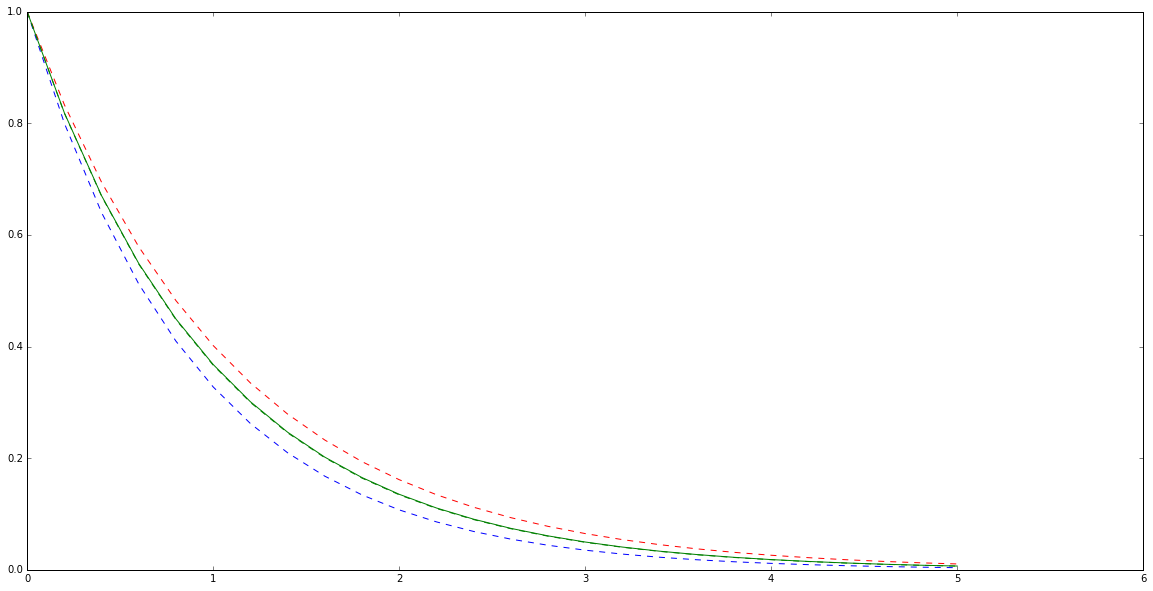

In [88]:
plt.figure(figsize=(20,10))
plt.plot( exact_x,[row[1] for row in forward_data], '--',
        exact_x,[row[1] for row in backward_data], 'r--',
        exact_x,[row[1] for row in centered_data], 'g--',
        exact_x,exact_y)

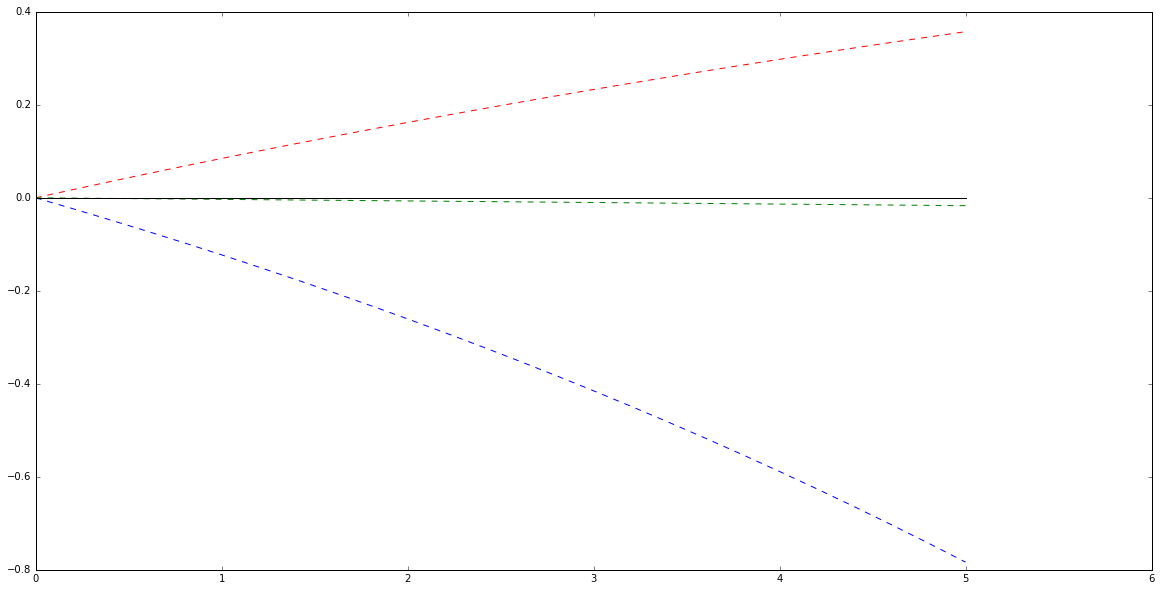

In [90]:
plt.figure(figsize=(20,10))

y_forward = [row[1] for row in forward_data]
y_backward = [row[1] for row in backward_data]
y_centered = [row[1] for row in centered_data]

plt.plot( exact_x,(y_forward-exact_y)/y_forward, '--',
        exact_x,(y_backward-exact_y)/y_backward, 'r--',
        exact_x,(y_centered-exact_y)/y_centered, 'g--',
        exact_x, np.zeros(len(exact_x)),'k-')

In [96]:
def plot_results(u_0,delta_t,method):
    data = []
    u_n = u_0
    time = 0
    for i in range(0,10):    
        data.append([time,u_n])
        u_n = method(u_n,delta_t)
        time = time + delta_t  
    plt.figure(figsize=(20,10))
    plt.plot( exact_x, exact_y, [row[0] for row in data], [row[1] for row in data] , 'g--')

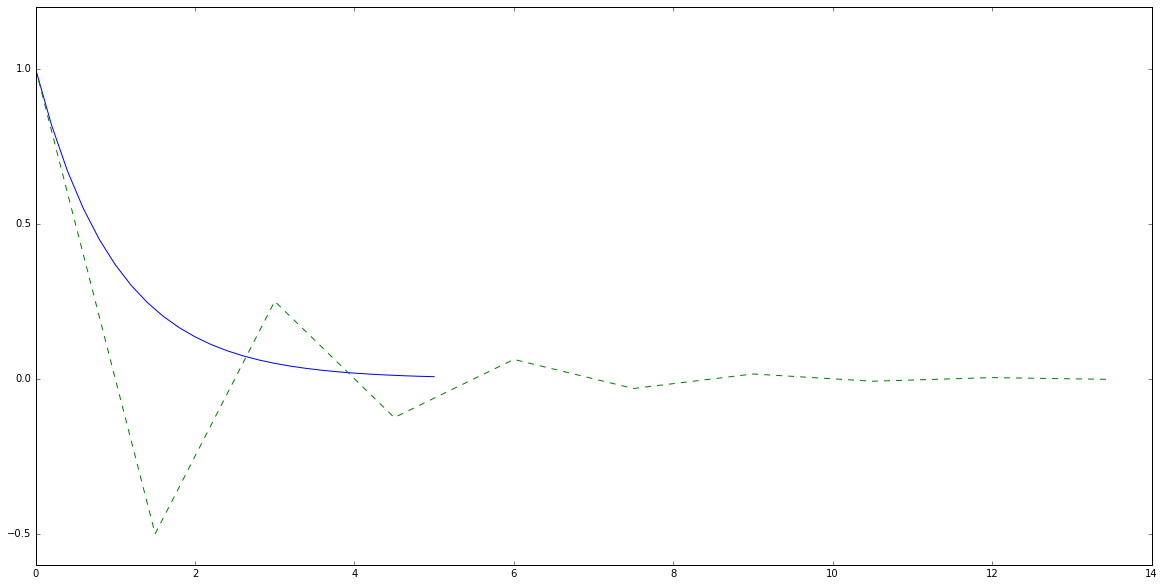

In [97]:
plot_results(1,1.5,forward_time)

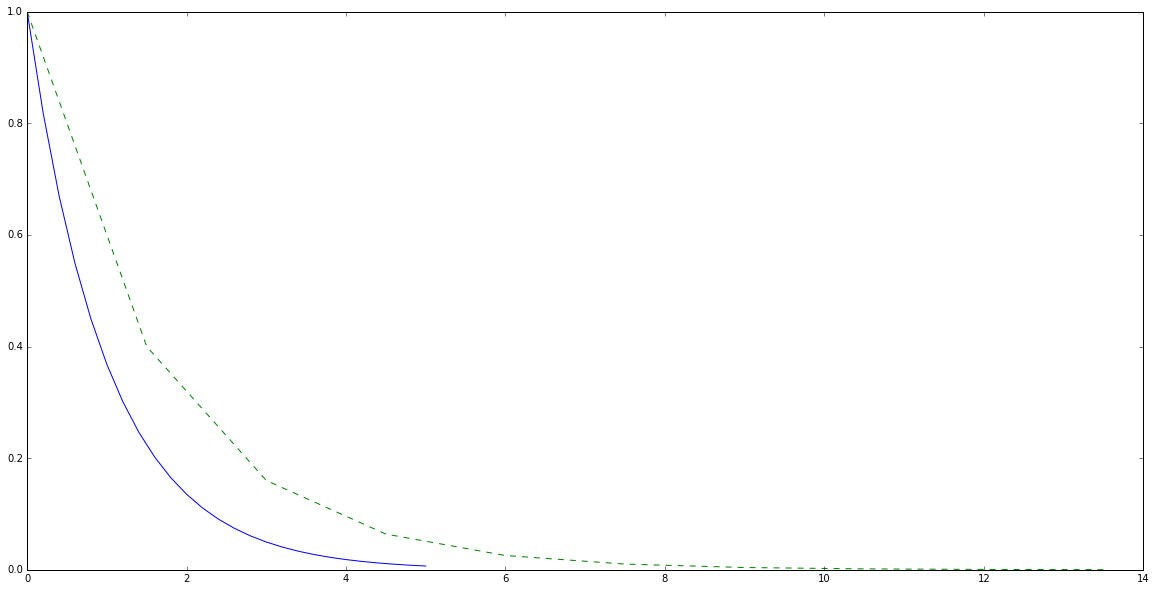

In [98]:
plot_results(1,1.5,backward_time)

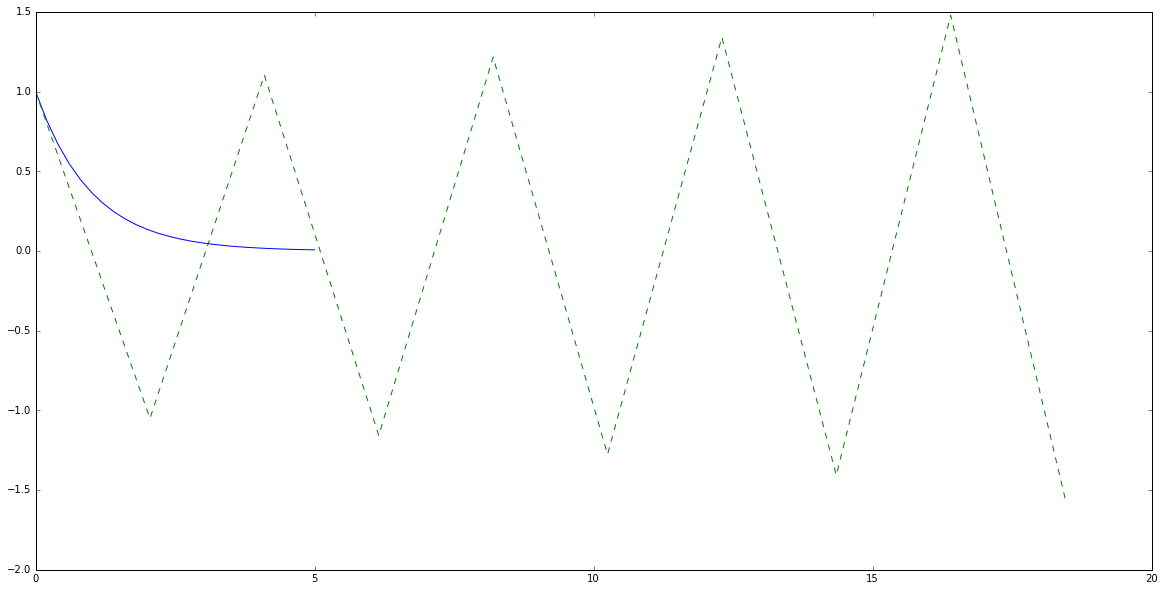

In [99]:
plot_results(1,2.05,forward_time)

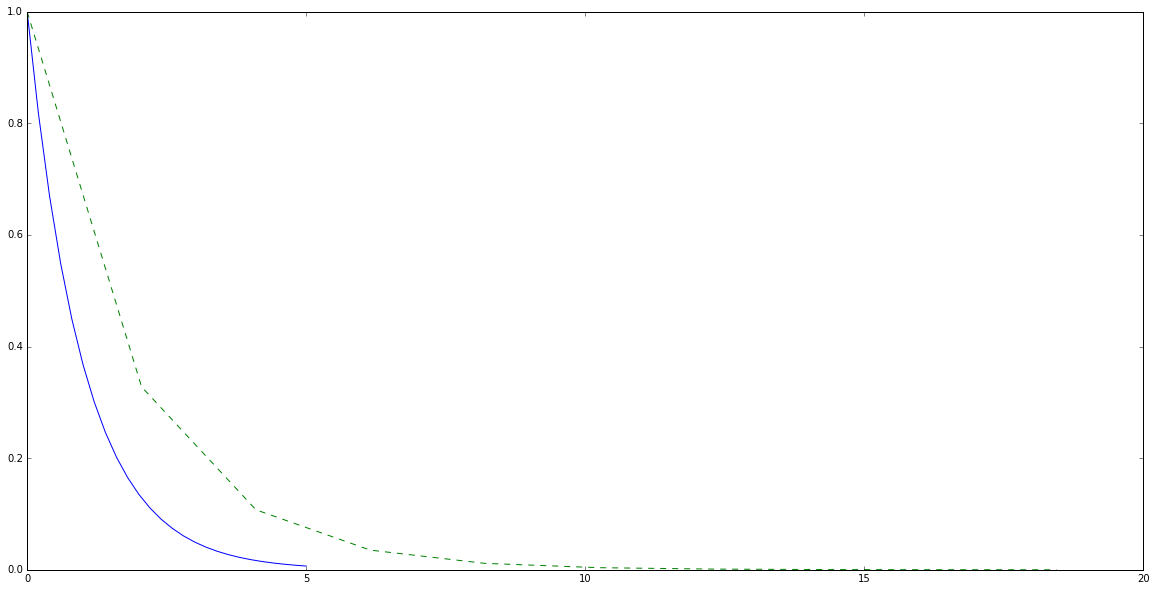

In [100]:
plot_results(1,2.05,backward_time)

In [101]:
def fourth_time(u_n,u_n_minus,delta_t):
    return u_n, -2*delta_t*u_n+u_n_minus

In [121]:
def fourth_plot_results(u_0,delta_t):
    data = []
    u_n = u_0
    u_n_minus = u_0
    time = 0
    for i in range(0,200):    
        data.append([time,u_n])
        u_n_minus, u_n = fourth_time(u_n,u_n_minus,delta_t)
        time = time + delta_t  
    plt.figure(figsize=(20,10))
    plt.plot( exact_x, exact_y, [row[0] for row in data], [row[1] for row in data] , 'g--')

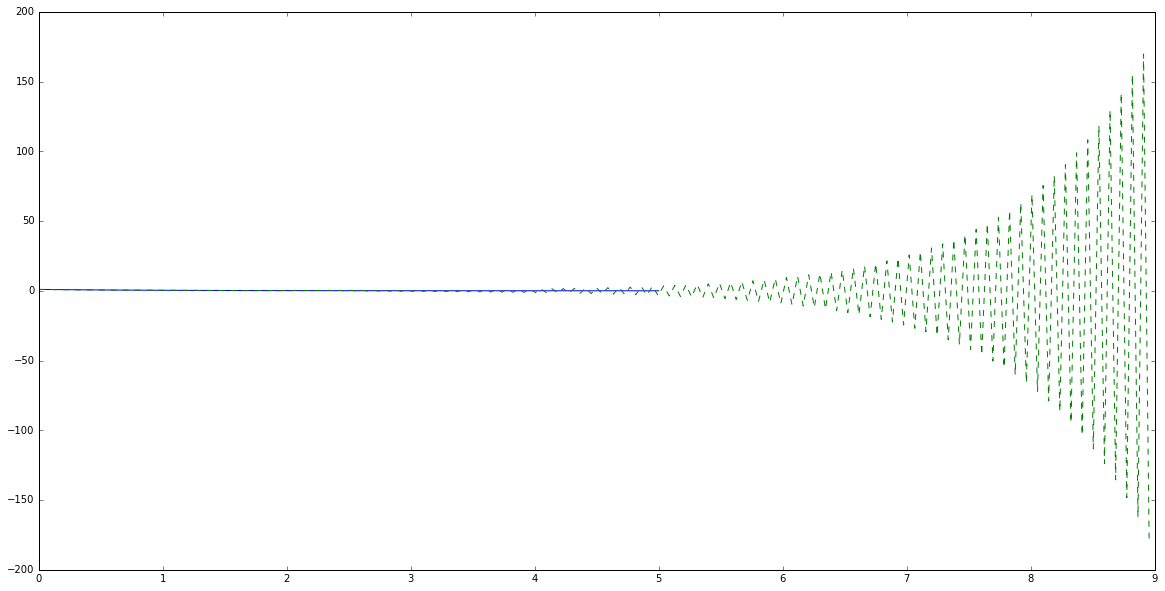

In [122]:
fourth_plot_results(1,0.045)

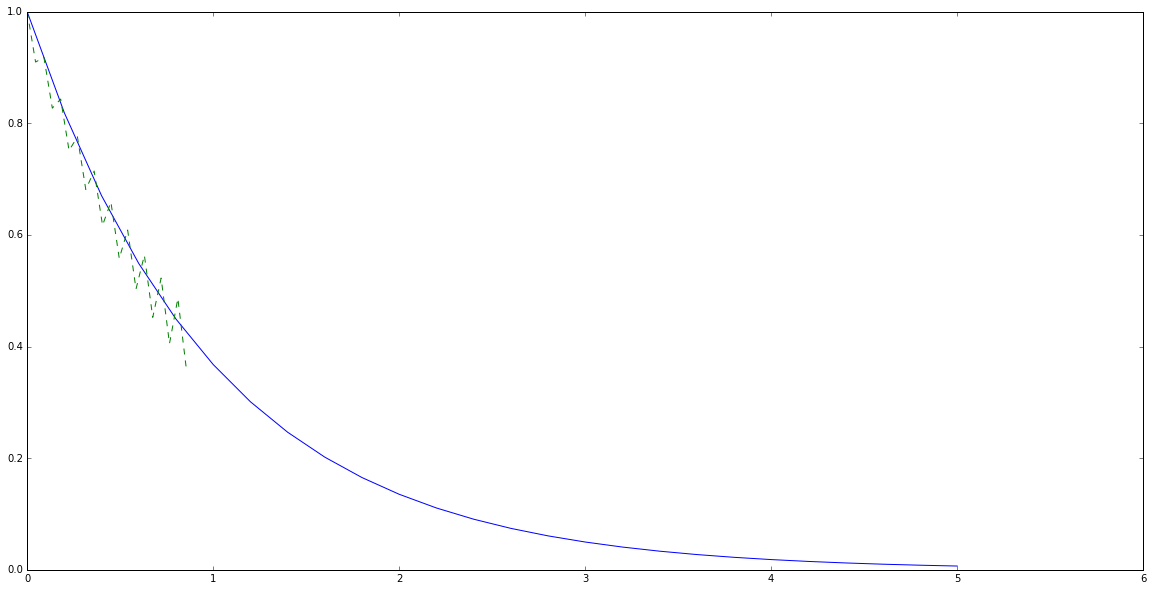

In [114]:
fourth_plot_results(1,0.045)

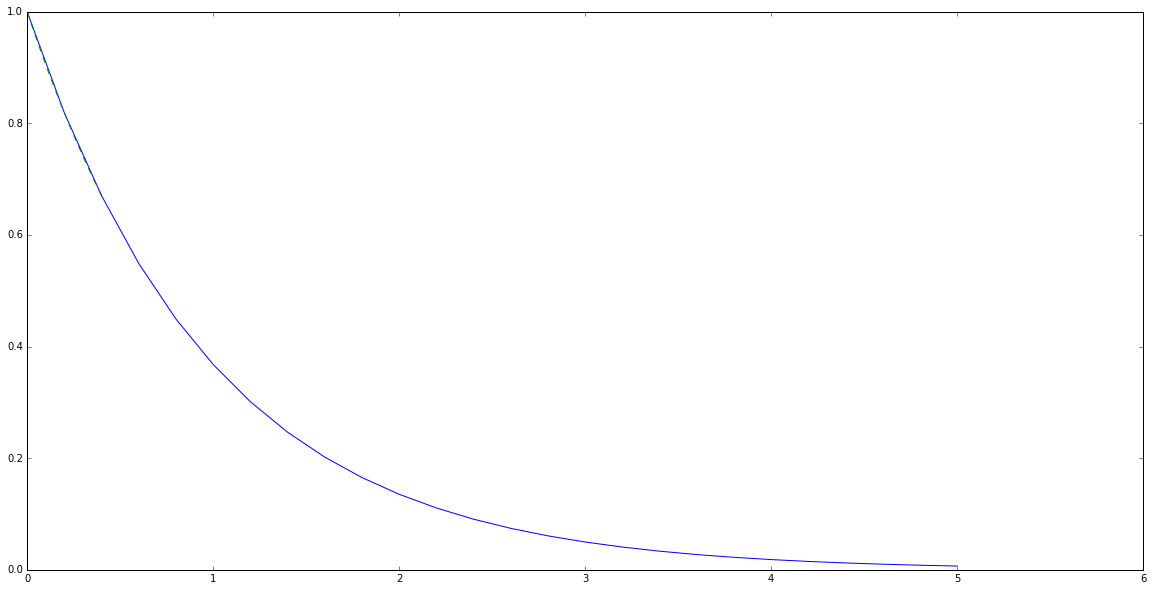

In [117]:
plot_results(1,0.045,centered_time)